Desafio 13: Avaliação de Desempenho em Suporte Técnico

📂 Dataset: Dados de atendimentos realizados por uma equipe de suporte técnico, incluindo: Atendente, Tempo_Atendimento_min, Satisfacao_Cliente (escala de 1 a 5), Tipo_Problema, Resolvido, Data.

🎯 Atividades:

Qual atendente tem a maior média de satisfação entre os atendimentos resolvidos?

Qual é o tempo médio de atendimento por tipo de problema?

Qual percentual de problemas foram resolvidos no total?

Crie um gráfico de barras com a média de satisfação por atendente.

Qual dia teve o maior número de atendimentos?

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#Testando o dataset
df = pd.read_csv("dia_13_suporte_tecnico.csv")
df.head()

,Atendente,Tempo_Atendimento_min,Satisfacao_Cliente,Tipo_Problema,Resolvido,Data
0,Carla,54,1,Senha esquecida,True,2024-03-07
1,Ana,50,3,Atualização,True,2024-03-06
2,Carla,12,4,Senha esquecida,True,2024-03-05
3,Ana,12,5,Erro no sistema,True,2024-03-07
4,Carla,58,3,Erro no sistema,True,2024-03-11


In [50]:
#Qual atendente tem a maior média de satisfação entre os atendimentos resolvidos?
resolvidos = df[df["Resolvido"] == True]
satisfacao = resolvidos.groupby("Atendente")["Satisfacao_Cliente"].mean()
print(f"O atendente com maior média de satisfação é {satisfacao.idxmax()}, com média de {satisfacao.max():.2f}")

O atendente com maior média de satisfação é Diego, com média de 3.50


In [51]:
#Qual é o tempo médio de atendimento por tipo de problema?
atendimentoMedio = df.groupby("Tipo_Problema")["Tempo_Atendimento_min"].mean().sort_values(ascending=False)
print(f"{atendimentoMedio.apply(lambda x: f"{x:.0f} Minutos").to_string()}")

Tipo_Problema
Conexão            35 Minutos
Atualização        34 Minutos
Erro no sistema    33 Minutos
Instalação         31 Minutos
Senha esquecida    30 Minutos


In [52]:
#Qual percentual de problemas foram resolvidos no total?
percentResolvidos = df["Resolvido"].mean() * 100
print(f"{percentResolvidos}% dos problemas foram resolvidos.")

95.0% dos problemas foram resolvidos.


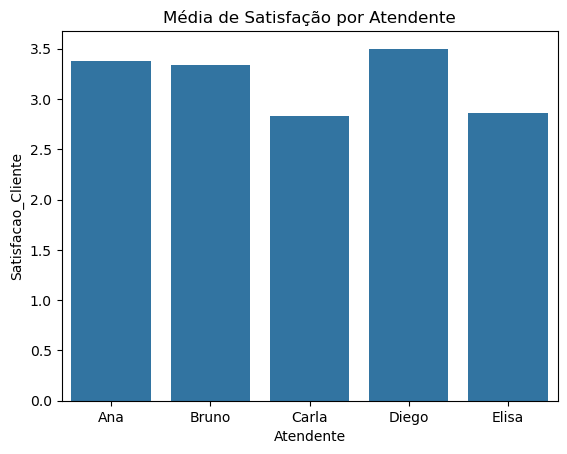

In [54]:
#Crie um gráfico de barras com a média de satisfação por atendente.
satisfacao = resolvidos.groupby("Atendente")["Satisfacao_Cliente"].mean().reset_index()
sns.barplot(data=satisfacao, x="Atendente", y="Satisfacao_Cliente")
plt.title("Média de Satisfação por Atendente")
plt.show()

In [46]:
#Qual dia teve o maior número de atendimentos?
df["Data"] = pd.to_datetime(df["Data"])
df["Dia"] = df["Data"].dt.day

atendimentoDia = df["Dia"].value_counts()
print(f"O dia com mais atendimentos foi: Dia {atendimentoDia.idxmax()} com {atendimentoDia.max()} atendimentos.")

O dia com mais atendimentos foi: Dia 11 com 7 atendimentos.
